<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula02a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
type(data)

sklearn.utils._bunch.Bunch

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [4]:
data["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data['data'][:10,:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564],
       [ 0.06350368,  0.05068012, -0.00189471,  0.06662945,  0.09061988],
       [ 0.04170844,  0.05068012,  0.06169621, -0.04009893, -0.01395254],
       [-0.07090025, -0.04464164,  0.03906215, -0.03321323, -0.01257658]])

In [9]:
data['target'][:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [10]:
from collections import Counter
Counter(sorted(data['target']))

Counter({np.float64(25.0): 1,
         np.float64(31.0): 1,
         np.float64(37.0): 1,
         np.float64(39.0): 2,
         np.float64(40.0): 1,
         np.float64(42.0): 3,
         np.float64(43.0): 1,
         np.float64(44.0): 1,
         np.float64(45.0): 1,
         np.float64(47.0): 2,
         np.float64(48.0): 3,
         np.float64(49.0): 3,
         np.float64(50.0): 1,
         np.float64(51.0): 3,
         np.float64(52.0): 4,
         np.float64(53.0): 4,
         np.float64(54.0): 1,
         np.float64(55.0): 4,
         np.float64(57.0): 1,
         np.float64(58.0): 1,
         np.float64(59.0): 4,
         np.float64(60.0): 3,
         np.float64(61.0): 2,
         np.float64(63.0): 4,
         np.float64(64.0): 3,
         np.float64(65.0): 4,
         np.float64(66.0): 2,
         np.float64(67.0): 2,
         np.float64(68.0): 3,
         np.float64(69.0): 3,
         np.float64(70.0): 2,
         np.float64(71.0): 5,
         np.float64(72.0): 6,
         n

In [11]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

2


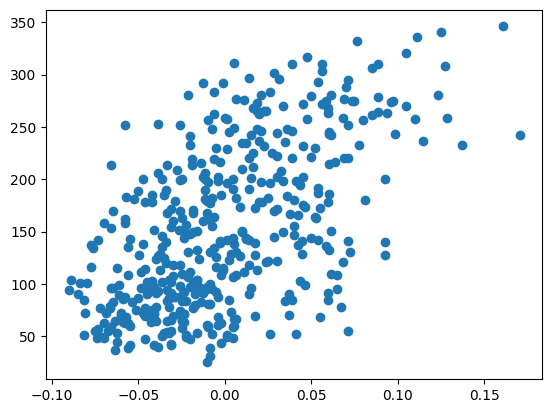

In [14]:
import matplotlib.pyplot as plt
for i in [2]: #range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

In [15]:
X[:,2].shape

(442,)

In [16]:
X2 = X[:,2:3]
X2.shape

(442, 1)

In [18]:
def modelo_linear(X, w, b):
  y = w*X + b
  return y

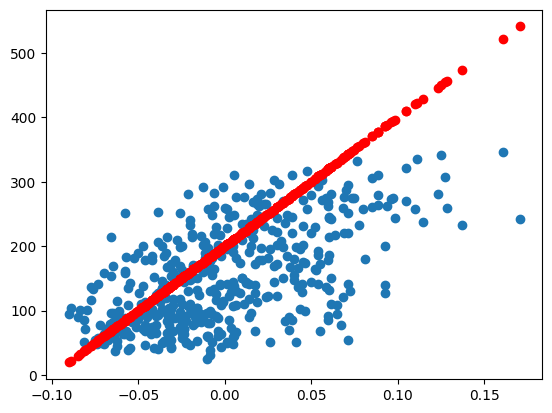

In [27]:
ypred = modelo_linear(X2, 2000, 200)
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

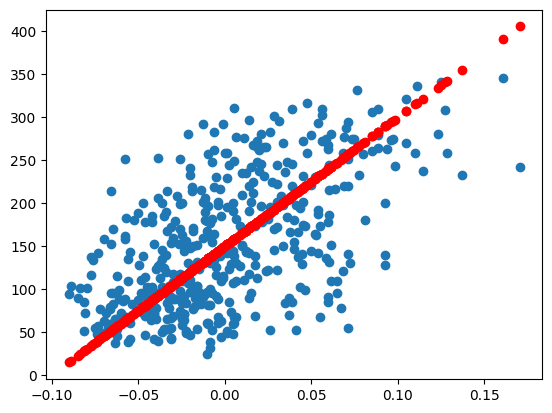

In [28]:
ypred = modelo_linear(X2, 1500, 150)
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

In [30]:
# mean absolute error
def mae(y, ypred):
  return abs(y-ypred).mean()

print(mae(y, modelo_linear(X2, 2000, 200)))
print(mae(y, modelo_linear(X2, 1500, 150)))

104.45722448189441
84.35123140377527


In [31]:
# mean squared error
def mse(y, ypred):
  return ((y-ypred)**2).mean()

print(mse(y, modelo_linear(X2, 2000, 200)))
print(mse(y, modelo_linear(X2, 1500, 150)))

17270.861990950176
11024.934389140271


In [32]:
print(mse(y, modelo_linear(X2, 150, 15)))

24786.382352941186


In [40]:
from math import sqrt
# root mean squared error
def rmse(y, ypred):
  return sqrt(((y-ypred)**2).mean())

print(rmse(y, modelo_linear(X2, 2000, 200)))
print(rmse(y, modelo_linear(X2, 1500, 150)))

131.41865160984636
104.9996875668698


In [42]:
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y, modelo_linear(X2, 2000, 200)))
print(root_mean_squared_error(y, modelo_linear(X2, 1500, 150)))

93.15947449847592
67.68163460313127


[0.57555798]
170.505161220101


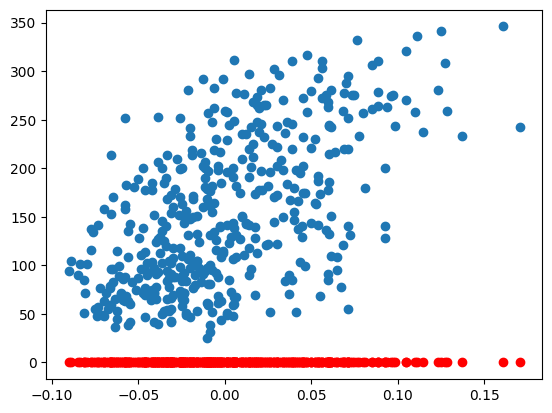

In [73]:
import numpy as np

class LinearRegression():
  def __init__(self):
    pass

  def fit(self, X, y):
    self.w = np.random.rand(X.shape[1])
    print(self.w)
    return self

  def predict(self, X):
    return X @ self.w

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)

modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(modelo.score(X2, y))
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

[949.43526038]
164.42339732837127


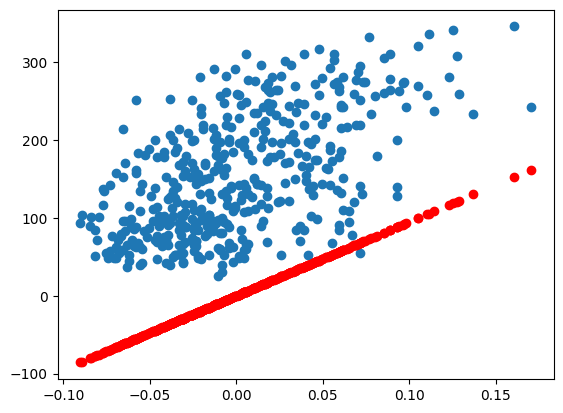

In [76]:
import numpy as np

class LinearRegression():
  def __init__(self):
    self.learning_rate = 1

  def fit(self, X, y):
    self.w = np.random.rand(X.shape[1])
    for _ in range(1000):
      ypred = X @ self.w
      error = ypred - y
      grad = X.T @ error
      self.w -= grad * self.learning_rate
    print(self.w)
    return self

  def predict(self, X):
    return X @ self.w

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(modelo.score(X2, y))
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

[152.13348416 949.39237974]
62.37352474905791


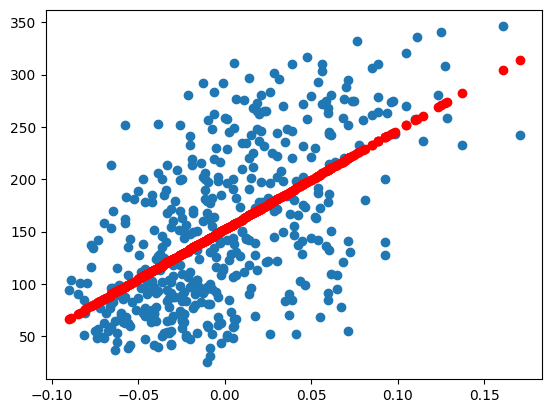

In [80]:
import numpy as np

def add_bias(X):
  bias = np.ones((X.shape[0], 1))
  return np.concatenate((bias, X), axis=1)

class LinearRegression():
  def __init__(self):
    self.learning_rate = 0.001

  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.random.rand(X.shape[1])
    for _ in range(10000):
      ypred = X @ self.w
      error = ypred - y
      grad = X.T @ error
      self.w -= grad * self.learning_rate
    print(self.w)
    return self

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(modelo.score(X2, y))
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

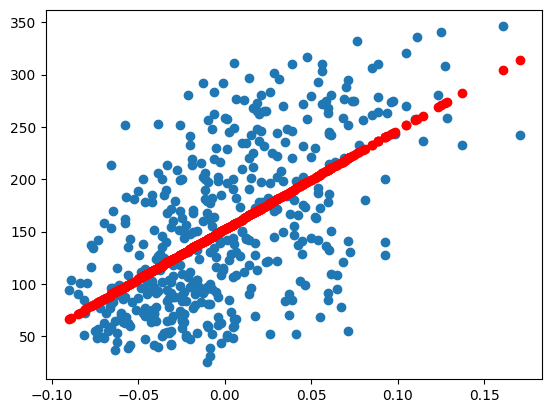

In [81]:
ypred = modelo_linear(X2, 949.39237974, 152.13348416 )
plt.scatter(X2, y)
plt.scatter(X2, ypred, c='r')
plt.show()

In [82]:
modelo = LinearRegression()
modelo.fit(X, y)
print(modelo.score(X, y))

[ 152.13348416   -6.58441243 -236.6028461   529.02696532  322.14036575
  -93.31864378  -89.18433178 -198.2405064   110.5809907   483.90990764
   70.52632907]
53.653562954488436


In [86]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(root_mean_squared_error(y, ypred))
modelo.coef_, modelo.intercept_

53.47612876402657


(array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]),
 np.float64(152.13348416289597))